# Transformada de Hough

## Detecção de Linhas

(224, 448, 3)


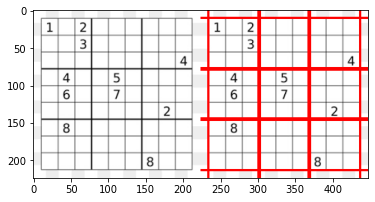

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgOrig = cv2.imread('sudoku.png')
img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)


# stacking images side-by-side 
res = np.hstack((imgOrig, img)) 
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
print(res.shape)

## Detecção de Circulos

(183, 550, 3)


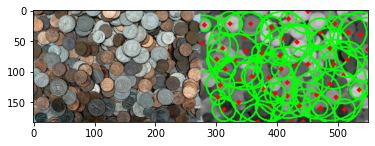

In [56]:
img = cv2.imread('coins2.jpeg',0)
imgOrig = cv2.imread('coins2.jpeg')

img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    


# stacking images side-by-side 
res = np.hstack((imgOrig, cimg)) 
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
print(res.shape)